In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import pandas as pd
import json
import xml.etree.ElementTree as ET

In [66]:
# Using XML web scraping from a chosen steam community page to get a large amount of varied Steam IDs
xml_url = "https://steamcommunity.com/groups/SteamDB/memberslistxml/?xml=1"

response = requests.get(xml_url)

root = ET.fromstring(response.content)

id_list = []

for x in root.iter('steamID64'):
    id_list.append(int(x.text))


In [68]:
# Extending list of user ids with other available ids
id_list.extend([76561198022981376, 76561198042246813, 76561198046998765, 76561198062545361, 76561198068342857, 76561198032238060, 76561198042091058])

In [71]:
# Set your Steam API key
api_key = "A9283666CBEBA01186FF7EB5D8F80120"

steam_ids = id_list

# List to store the dictionaries
data_list = []

# Loop through the Steam IDs
for steam_id in steam_ids:

    url = f"http://api.steampowered.com/IPlayerService/GetOwnedGames/v0001/?key={api_key}&steamid={steam_id}&format=json"

    response = requests.get(url)

    data = json.loads(response.text)
    
    if 'games' not in data["response"]:

        print(f"Skipping {steam_id} - no games found")

        continue

    games = data["response"]['games']

    game_data = []

    for game in games:

        game_data.append({"appid": game["appid"], "playtime_forever": game["playtime_forever"]})

    dict = {'steam_id': steam_id, 'game_data': game_data}

    data_list.append(dict)


Skipping 76561197990586091 - no games found
Skipping 76561198815122240 - no games found
Skipping 76561198078811585 - no games found
Skipping 76561198112013468 - no games found
Skipping 76561198113716843 - no games found
Skipping 76561199402635936 - no games found
Skipping 76561199402670892 - no games found


In [72]:
def get_app_list():
    url = "https://api.steampowered.com/ISteamApps/GetAppList/v2/"
    response = requests.get(url)
    app_list = response.json()
    return app_list['applist']['apps']

In [73]:
game_names = get_app_list()

appid_name_map = {game['appid']: game['name'] for game in game_names}


for x in data_list:
    for game in x['game_data']:
    
        if game['appid'] in appid_name_map:
    
            game['name'] = appid_name_map[game['appid']]



In [74]:
df_data = []


for x in data_list:

    game_data = x['game_data']

    temp_data = {'steam_id': x['steam_id']}


    for game in game_data:

        if 'name' in game and 'playtime_forever' in game:

            temp_data[game['name']] = game['playtime_forever']

    
    df_data.append(temp_data)


df = pd.DataFrame(df_data)


df

,steam_id,Counter-Strike,Team Fortress Classic,Day of Defeat,Deathmatch Classic,Half-Life: Opposing Force,Ricochet,Half-Life,Half-Life: Blue Shift,Counter-Strike: Condition Zero,...,Special Forces: Team X,Godhood,Bear and Breakfast,Lightyear Frontier,Football Manager 2013,Football Manager 2014,Football Manager 2018,Football Manager Touch 2018,It's Quiz Time,Dungeon Alchemist
0,76561197972494985,161264.0,92.0,34.0,28.0,255.0,69.0,369.0,225.0,1072.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76561198074261126,5.0,3.0,3.0,3.0,3.0,451809.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76561198020275445,5.0,7.0,6.0,0.0,0.0,0.0,918.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76561198820816240,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76561197998401807,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,76561198046998765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,76561198062545361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,33168.0,74610.0,19993.0,0.0,1194.0,NaN
997,76561198068342857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0
998,76561198032238060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
new_df = pd.melt(df, id_vars=['steam_id'], var_name='game', value_name='playtime')

new_df = new_df.dropna(subset=['playtime'])

new_df

,steam_id,game,playtime
0,76561197972494985,Counter-Strike,161264.0
1,76561198074261126,Counter-Strike,5.0
2,76561198020275445,Counter-Strike,5.0
4,76561197998401807,Counter-Strike,0.0
8,76561198125016142,Counter-Strike,0.0
...,...,...,...
21751996,76561198062545361,Football Manager 2014,74610.0
21752996,76561198062545361,Football Manager 2018,19993.0
21753996,76561198062545361,Football Manager Touch 2018,0.0
21754996,76561198062545361,It's Quiz Time,1194.0


In [114]:
new_df.describe()

,steam_id,playtime
count,4.012980e+05,4.012980e+05
mean,7.656120e+16,2.908788e+03
std,4.192005e+08,6.242635e+04
min,7.656120e+16,0.000000e+00
25%,7.656120e+16,0.000000e+00
50%,7.656120e+16,0.000000e+00
75%,7.656120e+16,2.300000e+02
max,7.656120e+16,4.308019e+06


In [119]:
game_playtime = new_df.groupby('game')['playtime'].sum().reset_index()


# Sort the data by playtime in descending order

game_playtime = game_playtime.sort_values('playtime', ascending=False)
game_playtime

,game,playtime
3791,Counter-Strike 2,87586022.0
7558,Grand Theft Auto V,24552074.0
20209,Wallpaper Engine,17855308.0
3795,Counter-Strike: Source,16472866.0
11868,NEKOPARA Vol. 0,15236511.0
...,...,...
13924,RATUZ,0.0
4144,DANGEROUS DUELS,0.0
13928,RAZED,0.0
13931,RD Mars,0.0


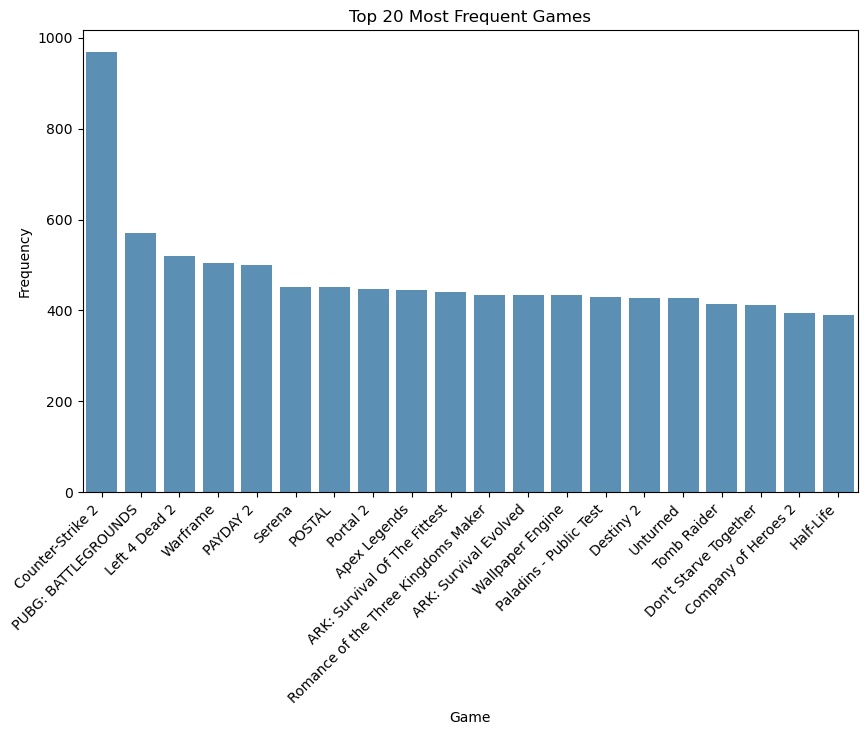

In [117]:
# Plot a graph to see the most frequent games in the users' libraries
game_counts = new_df['game'].value_counts().head(20)

plt.figure(figsize=(10, 6))

sns.barplot(x=game_counts.index, y=game_counts.values, alpha=0.8)

plt.title('Top 20 Most Frequent Games')

plt.xlabel('Game')
plt.xticks(rotation=45, ha='right')

plt.ylabel('Frequency')


plt.show()

In [128]:
# Shows that all users in the list has at least 1 game, with some having more than 10,000 games
user_counts = new_df['steam_id'].value_counts()
user_counts

steam_id
76561199080934614    11712
76561198074261126    10657
76561197990492433    10199
76561198859098173     9272
76561198102366264     8827
                     ...  
76561199020083901        2
76561199019805931        2
76561199020295277        2
76561199214460043        1
76561199139985927        1
Name: count, Length: 1000, dtype: int64

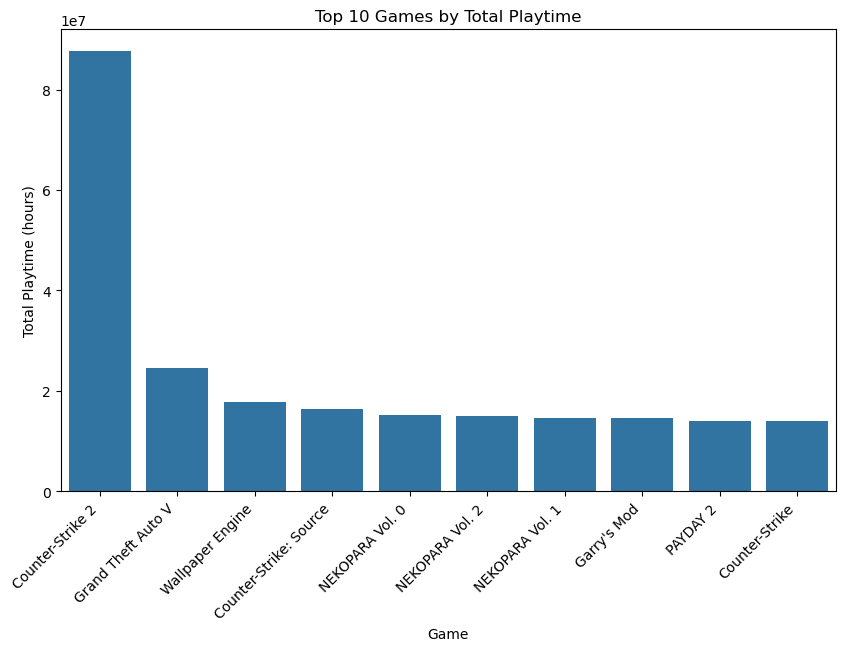

In [110]:
# Plotting a graph to the games with largest playtime
game_playtime = new_df.groupby('game')['playtime'].sum().reset_index()

game_playtime = game_playtime.sort_values('playtime', ascending=False)


plt.figure(figsize=(10, 6))

sns.barplot(x='game', y='playtime', data=game_playtime.head(10))

plt.title('Top 10 Games by Total Playtime')
plt.xlabel('Game')
plt.ylabel('Total Playtime (hours)')
plt.xticks(rotation=45, ha='right')


plt.show()

In [101]:
df.dtypes

steam_id                         int64
Counter-Strike                 float64
Team Fortress Classic          float64
Day of Defeat                  float64
Deathmatch Classic             float64
                                ...   
Football Manager 2014          float64
Football Manager 2018          float64
Football Manager Touch 2018    float64
It's Quiz Time                 float64
Dungeon Alchemist              float64
Length: 21757, dtype: object

In [75]:
# Function to check for nulls and display as a table with both null values and as a percentage
def null_vals(dataframe):
    '''Function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum() # How many nulls in each column
    total_cnt = len(dataframe) # Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) # Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) # Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False) #Return the number and percentage of missing values, order by percentage descending

null_vals(df) #Display the table

,null,percent
Beasts of Prey,999,99.9
Revenge of the Headless,999,99.9
Battle of Kings,999,99.9
Shadow of Something,999,99.9
The Drain Collector,999,99.9
...,...,...
Warframe,496,49.6
Left 4 Dead 2,480,48.0
PUBG: BATTLEGROUNDS,429,42.9
Counter-Strike 2,32,3.2


In [49]:
# Code to remove columns with a certain percentage of null value

threshold = 0.7  # remove columns with more than 70% null values


df.dropna(axis=1, thresh=int((1 - threshold) * len(df)), inplace=True)

In [116]:
# Code to see if a game if present in the data
column_name = "Baldur's Gate 3"


if column_name in df:

    print(f"Column '{column_name}' exists in the DataFrame")

else:

    print(f"Column '{column_name}' does not exist in the DataFrame")

Column 'Baldur's Gate 3' exists in the DataFrame
